In [2]:
import csv
import cobra
import pandas as pd
import json
import numpy as np
import cobra
import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn3
import math
import scipy
from scipy.stats import hypergeom

In [3]:
# read in data
d_70 = pd.read_csv("../../data/simulation_results/sample_conc_70.csv")
d_49 = pd.read_csv("../../data/simulation_results/sample_conc_49.csv")
d_30 = pd.read_csv("../../data/simulation_results/sample_conc_30.csv")
d_30.head()

Unnamed: 0       XANt2  BGLK        APRAUR      GLUR    ADAPAT  \
0           0 -999.378934   0.0 -6.965612e-17  0.190642 -0.122839   
1           1 -995.518128   0.0 -2.429248e-15  0.195641 -0.123877   
2           2 -991.112801   0.0 -1.611395e-15  0.194782 -0.123299   
3           3 -981.660598   0.0 -2.737919e-15  0.196724 -0.122326   
4           4 -983.755281   0.0 -2.822300e-15  0.194910 -0.121944   

   EX_cgly_LPAREN_e_RPAREN_     NODOy    UPP3MT       PUNP1    ...     \
0              6.360717e-15  0.000008  0.000012 -692.872931    ...      
1              8.552126e-15  0.000008  0.000012 -700.323856    ...      
2              8.568160e-15  0.000007  0.000012 -698.652359    ...      
3             -3.936679e-15  0.000008  0.000012 -695.888851    ...      
4             -7.814886e-15  0.000006  0.000011 -690.498288    ...      

   GLYTYRAP_rv  AMPEP10_rv  AMPEP13_rv   PIt7_rv  ACOTA_rv  FE3tex_rv  \
0    -0.000015   -0.000033   -0.000019 -0.000044 -0.027460  -0.000055   
1    -0.000015   -0.000033   -0.000019 -0.000045 -0.027494  -0.000334   
2    -0.000122   -0.002223   -0.001275 -0.000043 -0.027386  -0.000579   
3    -0.000123   -0.002229   -0.004121 -0.000045 -0.036146  -0.000583   
4    -0.000121   -0.002220   -0.004113 -0.000041 -0.035859  -0.000575   

   PLMET_rv     4MCO2D_rv  3MTDC_rv   FERO_rv  
0 -0.000015 -1.093854e-06 -0.000015 -0.000035  
1 -0.000015 -1.207240e-06 -0.000015 -0.000035  
2 -0.000036 -7.674875e-07 -0.000014 -0.022354  
3 -0.000036 -1.238567e-06 -0.000015 -0.001384  
4 -0.000035 -1.077903e-07 -0.005053 -0.001267  

[5 rows x 1474 columns]

In [4]:
# delete the first column(indexes) Just run once!!!
d_30 = d_30.drop(d_30.columns[0], axis = 1)
d_49 = d_49.drop(d_49.columns[0], axis = 1)
d_70 = d_70.drop(d_70.columns[0], axis = 1)
d_30.head()

XANt2  BGLK        APRAUR      GLUR    ADAPAT  \
0 -999.378934   0.0 -6.965612e-17  0.190642 -0.122839   
1 -995.518128   0.0 -2.429248e-15  0.195641 -0.123877   
2 -991.112801   0.0 -1.611395e-15  0.194782 -0.123299   
3 -981.660598   0.0 -2.737919e-15  0.196724 -0.122326   
4 -983.755281   0.0 -2.822300e-15  0.194910 -0.121944   

   EX_cgly_LPAREN_e_RPAREN_     NODOy    UPP3MT       PUNP1  ECOAH1    ...     \
0              6.360717e-15  0.000008  0.000012 -692.872931     0.0    ...      
1              8.552126e-15  0.000008  0.000012 -700.323856     0.0    ...      
2              8.568160e-15  0.000007  0.000012 -698.652359     0.0    ...      
3             -3.936679e-15  0.000008  0.000012 -695.888851     0.0    ...      
4             -7.814886e-15  0.000006  0.000011 -690.498288     0.0    ...      

   GLYTYRAP_rv  AMPEP10_rv  AMPEP13_rv   PIt7_rv  ACOTA_rv  FE3tex_rv  \
0    -0.000015   -0.000033   -0.000019 -0.000044 -0.027460  -0.000055   
1    -0.000015   -0.000033   -0.000019 -0.000045 -0.027494  -0.000334   
2    -0.000122   -0.002223   -0.001275 -0.000043 -0.027386  -0.000579   
3    -0.000123   -0.002229   -0.004121 -0.000045 -0.036146  -0.000583   
4    -0.000121   -0.002220   -0.004113 -0.000041 -0.035859  -0.000575   

   PLMET_rv     4MCO2D_rv  3MTDC_rv   FERO_rv  
0 -0.000015 -1.093854e-06 -0.000015 -0.000035  
1 -0.000015 -1.207240e-06 -0.000015 -0.000035  
2 -0.000036 -7.674875e-07 -0.000014 -0.022354  
3 -0.000036 -1.238567e-06 -0.000015 -0.001384  
4 -0.000035 -1.077903e-07 -0.005053 -0.001267  

[5 rows x 1473 columns]

In [5]:
# normalize by biomass rate:
d_30 = d_30/0.063
d_49 = d_49/0.106
d_70 = d_70/0.111
d_30.head()

XANt2  BGLK        APRAUR      GLUR    ADAPAT  \
0 -15863.157689   0.0 -1.105653e-15  3.026063 -1.949831   
1 -15801.875044   0.0 -3.855949e-14  3.105417 -1.966305   
2 -15731.949221   0.0 -2.557771e-14  3.091775 -1.957123   
3 -15581.914253   0.0 -4.345903e-14  3.122596 -1.941685   
4 -15615.163195   0.0 -4.479842e-14  3.093810 -1.935615   

   EX_cgly_LPAREN_e_RPAREN_     NODOy    UPP3MT         PUNP1  ECOAH1  \
0              1.009638e-13  0.000122  0.000184 -10997.983030     0.0   
1              1.357480e-13  0.000124  0.000184 -11116.251681     0.0   
2              1.360025e-13  0.000115  0.000184 -11089.719990     0.0   
3             -6.248697e-14  0.000125  0.000184 -11045.854779     0.0   
4             -1.240458e-13  0.000102  0.000182 -10960.290293     0.0   

     ...     GLYTYRAP_rv  AMPEP10_rv  AMPEP13_rv   PIt7_rv  ACOTA_rv  \
0    ...       -0.000234   -0.000528   -0.000300 -0.000702 -0.435877   
1    ...       -0.000236   -0.000529   -0.000302 -0.000707 -0.436411   
2    ...       -0.001936   -0.035286   -0.020245 -0.000685 -0.434695   
3    ...       -0.001949   -0.035382   -0.065406 -0.000711 -0.573750   
4    ...       -0.001922   -0.035236   -0.065291 -0.000650 -0.569191   

   FE3tex_rv  PLMET_rv  4MCO2D_rv  3MTDC_rv   FERO_rv  
0  -0.000866 -0.000234  -0.000017 -0.000234 -0.000552  
1  -0.005300 -0.000236  -0.000019 -0.000236 -0.000554  
2  -0.009196 -0.000567  -0.000012 -0.000228 -0.354818  
3  -0.009258 -0.000577  -0.000020 -0.000237 -0.021973  
4  -0.009131 -0.000555  -0.000002 -0.080202 -0.020110  

[5 rows x 1473 columns]

In [6]:
# transpose data  Just run once!!!
t_d_30 = d_30.transpose()
t_d_49 = d_49.transpose()
t_d_70 = d_70.transpose()

In [7]:
t_d_70.head()

0             1             2             3             4    \
XANt2   7.749995e+03  7.748941e+03  7.748947e+03  7.748677e+03  7.748673e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR  1.928001e-16  2.918277e-16  1.867581e-16  6.690752e-17  1.906264e-17   
GLUR    5.505734e-02  5.603015e-02  5.614146e-02  8.890944e-02  8.904339e-02   
ADAPAT -3.429179e-02 -3.428189e-02 -3.444529e-02 -1.299632e+00 -1.297685e+00   

                 5             6             7             8             9    \
XANt2   7.760080e+03  7.748451e+03  7.308409e+03  7.238310e+03  7.228622e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -1.213249e-16  2.647739e-16  3.418876e-16  2.609182e-14  2.609580e-14   
GLUR    1.664672e-01  1.669627e-01  1.797208e-01  5.125746e-01  5.160530e-01   
ADAPAT -1.292126e+00 -1.334548e+00 -1.396366e+00 -1.400411e+00 -1.418092e+00   

            ...                990           991           992           993  \
XANt2       ...      -6.473078e+03 -6.581935e+03 -6.658857e+03 -6.482969e+03   
BGLK        ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR      ...      -1.241501e-12 -1.189937e-12 -1.099468e-12 -1.197126e-12   
GLUR        ...       2.721581e+00  2.900582e+00  3.021364e+00  2.720951e+00   
ADAPAT      ...       1.727714e+00  1.107586e+00  1.001805e+00 -4.522992e-01   

                 994           995           996           997           998  \
XANt2  -6.699492e+03 -6.628231e+03 -6.528074e+03 -6.393561e+03 -6.151512e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -1.068037e-12 -1.056657e-12 -1.081004e-12 -1.599400e-12 -1.606895e-12   
GLUR    2.459400e+00  2.018103e+00  2.076583e+00  2.005277e+00  1.225294e+00   
ADAPAT -1.143968e-01  1.393797e+00  1.280518e+00  1.611268e+00  9.184041e-01   

                 999  
XANt2  -6.195256e+03  
BGLK    0.000000e+00  
APRAUR -1.638836e-12  
GLUR    1.146670e+00  
ADAPAT  1.220180e+00  

[5 rows x 1000 columns]

In [8]:
#check mean for reaction
t_d_70.loc[['G6PDH2r']].transpose().mean()

G6PDH2r    22.186839
dtype: float64

In [9]:
# generate mean fluxes
t_d_70_averages = t_d_70.mean(numeric_only=True, axis=1)
t_d_49_averages = t_d_49.mean(numeric_only=True, axis=1)
t_d_30_averages = t_d_30.mean(numeric_only=True, axis=1)
t_d_30_averages.head()

XANt2    -1.220320e+04
BGLK      0.000000e+00
APRAUR    1.276140e-14
GLUR      1.581556e+00
ADAPAT    5.915797e-01
dtype: float64

In [10]:
# generate std fluxes
t_d_70_std = t_d_70.std(numeric_only=True, axis=1)
t_d_49_std = t_d_49.std(numeric_only=True, axis=1)
t_d_30_std = t_d_30.std(numeric_only=True, axis=1)
t_d_30_std.head()

XANt2     3.601027e+03
BGLK      0.000000e+00
APRAUR    2.354365e-12
GLUR      7.355511e-01
ADAPAT    9.968548e-01
dtype: float64

In [11]:
# compare the high and low fluxes:
averages_70_30 = pd.DataFrame(t_d_70_averages, columns=['d_70_averages'])
averages_70_49 = pd.DataFrame(t_d_70_averages, columns=['d_70_averages'])
averages_70_30["d_30_averages"] = t_d_30_averages
averages_70_49["d_49_averages"] = t_d_49_averages
averages_70_49.head()

d_70_averages  d_49_averages
XANt2   -7.710021e+03  -8.231183e+03
BGLK     0.000000e+00   0.000000e+00
APRAUR  -4.101576e-13  -8.371588e-11
GLUR     2.565392e+00   1.622184e+00
ADAPAT   7.375507e-01   4.874888e-01

In [12]:
# generate difference matrices:
averages_70_30["difference"] = abs(averages_70_30["d_70_averages"]) - abs(averages_70_30["d_30_averages"] )
averages_70_49["difference"] = abs(averages_70_49["d_70_averages"]) - abs(averages_70_49["d_49_averages"] )
averages_70_49.head()

d_70_averages  d_49_averages    difference
XANt2   -7.710021e+03  -8.231183e+03 -5.211620e+02
BGLK     0.000000e+00   0.000000e+00  0.000000e+00
APRAUR  -4.101576e-13  -8.371588e-11 -8.330573e-11
GLUR     2.565392e+00   1.622184e+00  9.432082e-01
ADAPAT   7.375507e-01   4.874888e-01  2.500618e-01

In [13]:
# check up and downregulated reactions
up_70_30 = averages_70_30[averages_70_30["difference"]< -0.1]
down_70_30 = averages_70_30[averages_70_30["difference"] > 0.1]
up_70_49 = averages_70_49[averages_70_49["difference"]< -0.1]
down_70_49 = averages_70_49[averages_70_49["difference"] > 0.1]
up_70_49.head()

d_70_averages  d_49_averages   difference
XANt2   -7710.021287   -8231.183237  -521.161950
ATPM       38.090128      39.045580    -0.955452
RPI       -17.810837     -30.607723   -12.796886
GND        12.298858      22.163795    -9.864937
G3PD1    1069.598890    3074.438288 -2004.839398

In [14]:
saureus = cobra.io.load_json_model("../../data/models-sa/iron_adjusted_model/SAN315_with_iron.json")
saureus

<Model SA_N315_uid57837_158879_1 at 0x7f29a6c73ac8>

In [15]:
# Get the ids of upregulated & downregulated reactions as strings:
ids_up_70_49 = list(up_70_49.index)
ids_down_70_49 = list(down_70_49.index)
ids_up_70_30 = list(up_70_30.index)
ids_down_70_30 = list(down_70_30.index)

In [16]:
averages_70_49[averages_70_49.columns[:2]].to_csv("~/Dropbox/change7040.csv")

In [17]:
averages_70_49.loc[['PGK']]

d_70_averages  d_49_averages  difference
PGK     -21.122658     -13.103573    8.019085

In [18]:
averages_70_49.head()

d_70_averages  d_49_averages    difference
XANt2   -7.710021e+03  -8.231183e+03 -5.211620e+02
BGLK     0.000000e+00   0.000000e+00  0.000000e+00
APRAUR  -4.101576e-13  -8.371588e-11 -8.330573e-11
GLUR     2.565392e+00   1.622184e+00  9.432082e-01
ADAPAT   7.375507e-01   4.874888e-01  2.500618e-01

In [19]:
saureus.reactions.ATPS24

<Reaction ATPS24 at 0x7f29a0864940>

In [20]:
#compare high & medium (diff-matrix), high & low and medium & low:
diff_70_49 = abs(t_d_70) - abs(t_d_49)
diff_70_30 = abs(t_d_70) - abs(t_d_30)
diff_49_30 = abs(t_d_49) - abs(t_d_30)
diff_70_49.head()

0             1             2             3             4    \
XANt2  -1.681760e+03 -1.680113e+03 -1.676382e+03 -1.676062e+03 -1.674459e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -2.218781e-15 -3.091199e-15 -3.145263e-15 -7.868781e-16 -5.468340e-13   
GLUR    5.453446e-02  5.156798e-02  5.163196e-02 -3.021457e+00 -1.716778e+00   
ADAPAT  3.396494e-02  3.252508e-02  3.294915e-02  1.286580e+00  1.275828e+00   

                 5             6             7             8             9    \
XANt2  -1.423156e+03 -1.357294e+03 -1.457317e+03 -2.094814e+03 -1.818943e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -5.784586e-13 -5.520443e-13 -4.740736e-13 -4.265616e-13 -7.040992e-13   
GLUR   -2.350885e+00 -2.302433e+00 -2.312110e+00 -1.539569e+00 -1.446025e+00   
ADAPAT  1.246857e+00  1.207460e+00  1.221589e+00 -3.216947e+00 -2.673335e+00   

            ...                990           991           992           993  \
XANt2       ...      -2.281150e+03 -2.389207e+03 -2.310696e+03 -2.536253e+03   
BGLK        ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR      ...      -4.449958e-11 -4.470855e-11 -4.468824e-11 -4.500421e-11   
GLUR        ...       1.746456e+00  1.522206e+00  1.383595e+00  1.193819e+00   
ADAPAT      ...       1.239229e+00  9.711856e-01  8.705999e-01  3.176641e-01   

                 994           995           996           997           998  \
XANt2  -2.446178e+03 -2.015869e+03 -2.244684e+03 -2.427804e+03 -2.427427e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -4.873322e-11 -4.674130e-11 -5.028398e-11 -4.977230e-11 -4.939369e-11   
GLUR    1.049572e+00  6.311618e-01  9.608220e-01  8.679708e-01  2.375152e-01   
ADAPAT -6.145972e-04  1.354289e+00  1.158770e+00  1.602296e+00  7.529711e-01   

                 999  
XANt2  -2.339030e+03  
BGLK    0.000000e+00  
APRAUR -5.025958e-11  
GLUR    2.590680e-01  
ADAPAT  1.088672e+00  

[5 rows x 1000 columns]

In [21]:
#check
diff_70_49.head()

0             1             2             3             4    \
XANt2  -1.681760e+03 -1.680113e+03 -1.676382e+03 -1.676062e+03 -1.674459e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -2.218781e-15 -3.091199e-15 -3.145263e-15 -7.868781e-16 -5.468340e-13   
GLUR    5.453446e-02  5.156798e-02  5.163196e-02 -3.021457e+00 -1.716778e+00   
ADAPAT  3.396494e-02  3.252508e-02  3.294915e-02  1.286580e+00  1.275828e+00   

                 5             6             7             8             9    \
XANt2  -1.423156e+03 -1.357294e+03 -1.457317e+03 -2.094814e+03 -1.818943e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -5.784586e-13 -5.520443e-13 -4.740736e-13 -4.265616e-13 -7.040992e-13   
GLUR   -2.350885e+00 -2.302433e+00 -2.312110e+00 -1.539569e+00 -1.446025e+00   
ADAPAT  1.246857e+00  1.207460e+00  1.221589e+00 -3.216947e+00 -2.673335e+00   

            ...                990           991           992           993  \
XANt2       ...      -2.281150e+03 -2.389207e+03 -2.310696e+03 -2.536253e+03   
BGLK        ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR      ...      -4.449958e-11 -4.470855e-11 -4.468824e-11 -4.500421e-11   
GLUR        ...       1.746456e+00  1.522206e+00  1.383595e+00  1.193819e+00   
ADAPAT      ...       1.239229e+00  9.711856e-01  8.705999e-01  3.176641e-01   

                 994           995           996           997           998  \
XANt2  -2.446178e+03 -2.015869e+03 -2.244684e+03 -2.427804e+03 -2.427427e+03   
BGLK    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
APRAUR -4.873322e-11 -4.674130e-11 -5.028398e-11 -4.977230e-11 -4.939369e-11   
GLUR    1.049572e+00  6.311618e-01  9.608220e-01  8.679708e-01  2.375152e-01   
ADAPAT -6.145972e-04  1.354289e+00  1.158770e+00  1.602296e+00  7.529711e-01   

                 999  
XANt2  -2.339030e+03  
BGLK    0.000000e+00  
APRAUR -5.025958e-11  
GLUR    2.590680e-01  
ADAPAT  1.088672e+00  

[5 rows x 1000 columns]

In [22]:
#make new df for the important data (mean_diff, std, zvalue)
sum_70_30 = pd.DataFrame()
sum_70_49 = pd.DataFrame()
sum_49_30 = pd.DataFrame()

In [23]:
# get difference mean per reaction:
sum_70_49["mean_diff"] = diff_70_49.mean(axis=1)
sum_70_30["mean_diff"] = diff_70_30.mean(axis=1)
sum_49_30["mean_diff"] = diff_49_30.mean(axis=1)
sum_49_30.head() #check

mean_diff
XANt2  -4.206747e+03
BGLK    0.000000e+00
APRAUR  8.195400e-11
GLUR    4.062796e-02
ADAPAT -1.498874e-01

In [24]:
#add stdev:
sum_70_49["st_dev"] = diff_70_49.std(axis=1)
sum_70_30["st_dev"] = diff_70_30.std(axis=1)
sum_49_30["st_dev"] = diff_49_30.std(axis=1)
sum_49_30.head() #check

mean_diff        st_dev
XANt2  -4.206747e+03  2.604738e+03
BGLK    0.000000e+00  0.000000e+00
APRAUR  8.195400e-11  2.912386e-11
GLUR    4.062796e-02  1.118580e+00
ADAPAT -1.498874e-01  1.051313e+00

In [25]:
sum_70_49["z_val"] = abs(sum_70_49["mean_diff"])/(sum_70_49['st_dev'] / math.sqrt(1000))
sum_70_30["z_val"] = abs(sum_70_30["mean_diff"])/(sum_70_30['st_dev'] / math.sqrt(1000))
sum_49_30["z_val"] = abs(sum_49_30["mean_diff"])/(sum_49_30['st_dev'] / math.sqrt(1000))
sum_70_49.head() #check

mean_diff        st_dev      z_val
XANt2  -3.258607e+02  8.401040e+02  12.265885
BGLK    0.000000e+00  0.000000e+00        NaN
APRAUR -8.313786e-11  2.917288e-11  90.119675
GLUR    9.432082e-01  1.617274e+00  18.442676
ADAPAT  2.538031e-01  1.186729e+00   6.763095

In [26]:
#remove NaNs for 0s
sum_70_49['z_val'] = sum_70_49['z_val'].fillna(0)
sum_70_30['z_val'] = sum_70_30['z_val'].fillna(0)
sum_49_30['z_val'] = sum_49_30['z_val'].fillna(0)
sum_70_30.head() #check

mean_diff        st_dev      z_val
XANt2  -4.532608e+03  2.910289e+03  49.250651
BGLK    0.000000e+00  0.000000e+00   0.000000
APRAUR -1.183864e-12  1.455663e-12  25.718236
GLUR    9.838361e-01  1.420973e+00  21.894599
ADAPAT  1.039157e-01  1.258462e+00   2.611206

In [27]:
sum_70_49.head() #check

mean_diff        st_dev      z_val
XANt2  -3.258607e+02  8.401040e+02  12.265885
BGLK    0.000000e+00  0.000000e+00   0.000000
APRAUR -8.313786e-11  2.917288e-11  90.119675
GLUR    9.432082e-01  1.617274e+00  18.442676
ADAPAT  2.538031e-01  1.186729e+00   6.763095

In [28]:
# check for highest z-values, make matrices for them!
high_diff_70_49 = sum_70_49.loc[(sum_70_49['z_val'] > 20) & (abs(sum_70_49['mean_diff']) > 0.1)]
high_diff_70_30 = sum_70_30.loc[(sum_70_30['z_val'] > 20) & (abs(sum_70_30['mean_diff']) > 0.1)]
high_diff_49_30 = sum_49_30.loc[(sum_49_30['z_val'] > 20) & (abs(sum_49_30['mean_diff']) > 0.1)]
len(high_diff_70_30)

123

In [29]:
#prepare sets for venn diagram:
hd_70_49 = set(list(high_diff_70_49.index))
hd_70_30 = set(list(high_diff_70_30.index))
hd_49_30 = set(list(high_diff_49_30.index))


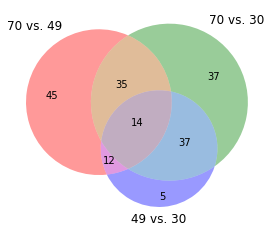

In [30]:
venn = venn3([hd_70_49,hd_70_30,hd_49_30],("70 vs. 49", "70 vs. 30", "49 vs. 30"))
matplotlib.pyplot.savefig('../../analysis/sampling/venn_diagram/Venn_diagram_python.svg', format='svg', dpi=1200)
plt.show()

In [31]:
# upregulated reactions:
all_altered_reacs = list(high_diff_70_49.index)+list(high_diff_70_30.index)+list(high_diff_49_30.index)
all_altered_reacs = list(dict.fromkeys(all_altered_reacs))
len(all_altered_reacs)

185

In [32]:
# create dictionary for important main pathways:
pathwaydict = {}
pathwaydict["Glycolysis"] = ['PPCK','ACLS_c','PYK','PGK','GAPDy','GLCBPP','ALDD2x','GAPD_fw','GAPD_rv','LDH_L_fw','LDH_L_rv',
                'TPI','ACS','PGM','ENO','ALCD2x_fw','ALCD2x_rv','G6PP', '6PHBG2','PGM','ENO','PGI','PFK', 'FBA']
pathwaydict["TCA-cycle"] = ['PPCK', 'CS', 'ACONTa_fw','ACONTa_rv', 'ICITRED', '2OXOTHP', 'FUM', 'ACONTb_fw','ACONTb_rv', 
         'OSUCCL','PC', 'SUCOAS', 'ICDHyr', 'CITL', 'AKGDH', 'SUCD1','MDH3', 'PDH' ]
pathwaydict["PPP"] = ['GND', 'DRPAr', 'G6PBDH', 'GNK', 'PPM2', 'PGLer', 'RPE_fw','RPE_rv', 'PRPPS', 
         'EX_pi_LPAREN_e_RPAREN_', 'SAS40', 'RBK', 'DDGLK', 'EDA', 'EX_rib_D_LPAREN_e_RPAREN_', 'RPI']
pathwaydict["Pyruvate metabolism"] = ['NDPK6_fw', 'CYTK1', 'PYNP1', 'UCPP', 'DCPP', 'URIK2', 'DTUPP', 'NDPK4_fw', '23PDE2pp', 'URIK3', 'DURIK1',
        'DAUPP', 'DGUPP', 'ASPCT', 'NDPK3_fw', 'URIDK2r', 'DUCYTP', 'NTD4pp', 'DURIPP', 'CYTDK1', 'RNTR4', 'CYTK2',
        'DTMPK_fw', 'CTPS2', 'CYTDK2', 'UMPK', 'NDPK2_fw', 'UDCTPP', 'NDPK7_fw', 'CDDTPP_fw', 'UUPP', 'UDUPP',
        'DUUPP', 'NTD1', 'TMDK1', 'OMPDC', 'DACTPP', 'RNDR3', '23PDE4pp', 'DHORTS_fw', 'RNDR4', 'CBPS', 'URIK1',
        'RNTR3', 'ORPT', 'PYNP2r', 'DUTPDP', 'NTPP8', 'TMDS', 'ADKd_fw', 'AIRC2', 'AIRC3', 'PRASCS', 'UPPRTr', 
        'TMDPP', 'NDPK7_rv', 'DTMPK_rv', 'NDPK2_rv', 'NDPK4_rv', 'CDDTPP_rv', 'NDPK3_rv', 'NDPK6_rv', 'ADKd_rv', 
        'DHORTS_rv']
pathwaydict["Purine metabolism"] = ['PUNP1', 'ATPM', 'RNDR1', 'ADK1_fw', 'PRASCSi', 'PUNP4', 'GNNUC', 'PUNP5', 'PRFGS', 'AICART', 'IMPD', 
        '23PDE9pp', 'XPPT', 'DGK1_fw', 'ADPT', 'NDPK5_fw', 'PUNP7', 'PYK', 'ADSS', 'ADNCYC', 'GLUPRT', 'RNTR1',
        'RNTR2', 'NDPK1_fw', 'NDPK9', 'AIRC', 'IMPC', 'ADSL1', 'NTD6pp', 'PUNP6', 'INSH','23PDE7pp', 'HXPRT',
        'GTPDPK', 'PUNP3', 'PRPPS', 'ADNUC', 'PRAIS', 'DADNK', 'GUAPRT', 'PUNP2', 'DADK_fw', 'NDPK8_fw', 'PRAGS',
        'XTSNH', 'ADSL2r', 'GK1_fw', 'DGNSK', 'GMPS2', 'RNDR2', 'GARFT_fw', 'NTPP2', 'NTPP9', 'NTPP11', 'NTPP10',
        'ADKd_fw', 'ADSK', 'AIRC2', 'AIRC3', 'PRASCS', 'UPPRTr', '3NTD9pp', 'DADK_rv', 'ADK1_rv', 'GARFT_rv', 
        'GK1_rv', 'NDPK8_rv', 'NDPK5_rv', 'DGK1_rv', 'NDPK1_rv', 'ADKd_rv', 'PRFGS', 'AIRC4']

pathwaydict.keys()

dict_keys(['Glycolysis', 'TCA-cycle', 'PPP', 'Pyruvate metabolism', 'Purine metabolism'])

In [33]:
# do hypergeometric tests:
# make a df for nicer results in report:
alteration_pathways_df = pd.DataFrame(index = ["Reactions", "Altered reactions",
                                              "P-value", "Significance"])
# initiate values for hypergeometric tests:
num_model_reactions = len(saureus.reactions)
num_reactions_changed = len(all_altered_reacs)
for pw in pathwaydict.keys():    
    num_reactions_in_path = len(pathwaydict[pw])
    num_reactions_in_path_change = len(set(pathwaydict[pw]).intersection(all_altered_reacs))
    hypergeom_test_pval = 1-hypergeom.cdf(num_reactions_in_path_change,num_model_reactions,
                  num_reactions_in_path,num_reactions_changed)
    signif = hypergeom_test_pval < 0.05
    col = [num_reactions_in_path,num_reactions_in_path_change,
          hypergeom_test_pval,signif]
    alteration_pathways_df[pw] = col
alteration_pathways_df


Glycolysis    TCA-cycle          PPP Pyruvate metabolism  \
Reactions                 24           18           16                  64   
Altered reactions          6            7           11                  16   
P-value            0.0235093  0.000768023  1.29209e-08          0.00148409   
Significance            True         True         True                True   

                  Purine metabolism  
Reactions                        73  
Altered reactions                20  
P-value                 0.000116751  
Significance                   True

In [34]:
alteration_pathways_df

Glycolysis    TCA-cycle          PPP Pyruvate metabolism  \
Reactions                 24           18           16                  64   
Altered reactions          6            7           11                  16   
P-value            0.0235093  0.000768023  1.29209e-08          0.00148409   
Significance            True         True         True                True   

                  Purine metabolism  
Reactions                        73  
Altered reactions                20  
P-value                 0.000116751  
Significance                   True

In [35]:
sum_70_49.loc[list(set(pathwaydict["PPP"]).intersection(all_altered_reacs))]

mean_diff      st_dev      z_val
EX_rib_D_LPAREN_e_RPAREN_  -16.222465    5.435433  94.380588
DRPAr                        1.571378    2.522396  19.700049
RPE_fw                       2.298763   10.106464   7.192750
SAS40                       -0.853514    8.478768   3.183304
RBK                       -170.999049  172.159380  31.409643
PRPPS                        3.090013    3.125255  31.266181
PPM2                         1.571378    2.522396  19.700049
EX_pi_LPAREN_e_RPAREN_      18.580576   22.234257  26.426313
PGLer                      -10.718451   17.389348  19.491655
GND                         -9.864937   16.760735  18.612351
RPI                        -12.796886    8.907287  45.431684

In [36]:
sum_70_30.loc[list(set(pathwaydict["PPP"]).intersection(all_altered_reacs))]

mean_diff      st_dev      z_val
EX_rib_D_LPAREN_e_RPAREN_  -18.336980    7.400755  78.352309
DRPAr                        2.032189    2.604448  24.674503
RPE_fw                       3.973036    5.815926  21.602482
SAS40                        4.354955    7.851840  17.539299
RBK                       -770.024140  454.557163  53.569283
PRPPS                        3.656379    3.321256  34.813600
PPM2                         2.032189    2.604448  24.674503
EX_pi_LPAREN_e_RPAREN_      26.206558   25.526376  32.465405
PGLer                       -9.753884   11.055267  27.900265
GND                        -14.108839    8.660855  51.514622
RPI                        -13.377675    8.588919  49.254069

In [37]:
sum_49_30.loc[list(set(pathwaydict["Purine metabolism"]).intersection(all_altered_reacs))]

mean_diff      st_dev       z_val
INSH     222.655356  512.425958   13.740484
ADK1_fw    3.774497    6.399101   18.652630
UPPRTr     0.406743    1.350694    9.522754
GLUPRT    -0.140587    0.601862    7.386638
PRFGS     -0.140587    0.601862    7.386638
AIRC    -459.357599  532.361110   27.286296
PRAGS     -0.140587    0.601862    7.386638
PUNP5    222.629380  512.354266   13.740803
ATPM     -25.552648    1.544575  523.150778
PRPPS      0.566367    2.385131    7.509058
ADSS      -0.093976    0.844349    3.519621
PRAIS     -0.140587    0.601862    7.386638
AICART    -0.141590    0.609095    7.351000
ADSL2r    -0.140587    0.601862    7.386638
ADSL1     -0.093976    0.844349    3.519621
XTSNH   -561.462513  961.139225   18.472874
AIRC2   -524.178046  563.172888   29.433173
AIRC3   -524.178046  563.172888   29.433173
IMPC      -0.141590    0.609095    7.351000
PUNP7   -561.462513  961.139225   18.472874

In [38]:
sum_70_30.loc[pathwaydict["PPP"]]

mean_diff        st_dev      z_val
GND                       -1.410884e+01  8.660855e+00  51.514622
DRPAr                      2.032189e+00  2.604448e+00  24.674503
G6PBDH                     0.000000e+00  0.000000e+00   0.000000
GNK                       -4.562340e-11  6.125454e-11  23.553169
PPM2                       2.032189e+00  2.604448e+00  24.674503
PGLer                     -9.753884e+00  1.105527e+01  27.900265
RPE_fw                     3.973036e+00  5.815926e+00  21.602482
RPE_rv                     5.026884e-01  1.918656e+00   8.285179
PRPPS                      3.656379e+00  3.321256e+00  34.813600
EX_pi_LPAREN_e_RPAREN_     2.620656e+01  2.552638e+01  32.465405
SAS40                      4.354955e+00  7.851840e+00  17.539299
RBK                       -7.700241e+02  4.545572e+02  53.569283
DDGLK                      1.053619e-12  1.644242e-11   2.026367
EDA                       -1.428183e-11  1.174753e-11  38.444796
EX_rib_D_LPAREN_e_RPAREN_ -1.833698e+01  7.400755e+00  78.352309
RPI                       -1.337767e+01  8.588919e+00  49.254069

In [39]:
saureus.reactions.CYSS

<Reaction CYSS at 0x7f29a4146048>

In [40]:
sum_70_49.loc[["CYSS","ORNCD"]]

mean_diff    st_dev     z_val
CYSS   -0.086585  1.069226  2.560770
ORNCD   0.013182  1.497086  0.278431

In [41]:
saureus.genes.SA1927

<Gene SA1927 at 0x7f29a4224f98>

In [42]:
saureus.metabolites.Fe

<Metabolite Fe at 0x7f29a42925f8>

In [43]:
sau_old = cobra.io.load_json_model("../../data/models-sa/initial-models-sa/SA_N315_uid57837_158879_1.json")
sau_new = cobra.io.load_json_model("../../data/models-sa/final_model_N315/SAN315_optimized.json")
saureus = cobra.io.load_json_model("../../data/models-sa/iron_adjusted_model/SAN315_with_iron.json")

In [44]:
before = 0
for r in sau_old.reactions:
    if len(r.subsystem) > 2 and r.subsystem != "None":
        print (r.subsystem)
        before += 1

Lipid &amp; Cell Wall Metabolism
Cell Envelope Biosynthesis
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Lipid &amp; Cell Wall Metabolism
Quinone Biosynthesis
Transport
Pyruvate Metabolism
Transport
Transport
Aminosugar Metabolism
Transport
Transport
Citric Acid Cycle
Transport
Transport
Transport
Transport
Transport
Transport
Transport
Fatty Acid Degradation
Fatty Acid Degradation
Fatty Acid Degradation
Pyruvate Metabolism
Valine, Leucine, and Isoleucine Metabolism
Transport
Aminosugar Metabolism
Vitamins &amp; Cofactor Biosynthesis
Cofactor and Prosthetic Group Biosynthesis
Purine and Pyrimidine Biosynthesis
Transport
Amino Acid Metabolism
Cell Envelope Biosynthesis
Urea Cycle
Purine and Pyrimidine Biosynthesis
Purine and Pyrimidine Biosynthesis
Transport
Methane Metabolism
Cofactor and Prosthetic Gro

In [45]:
after = 0
for r in sau_new.reactions:
    if len(r.subsystem) > 2 and r.subsystem != "None":
        print (r.subsystem)
        after += 1

Riboflavin metabolism; Metabolic pathways; Biosynthesis of secondary metabolites
Metabolic pathways; D-Glutamine and D-glutamate metabolism
Microbial metabolism in diverse environments; Porphyrin and chlorophyll metabolism; Metabolic pathways; Biosynthesis of secondary metabolites
Purine metabolism; Metabolic pathways
Microbial metabolism in diverse environments; Metabolic pathways; Lysine degradation; Benzoate degradation; Tryptophan metabolism; Fatty acid degradation; Butanoate metabolism; Biosynthesis of antibiotics
Arginine biosynthesis; Metabolic pathways; Biosynthesis of secondary metabolites; Alanine, aspartate and glutamate metabolism; Biosynthesis of antibiotics
Purine metabolism
Metabolic pathways; Arginine and proline metabolism; Biosynthesis of secondary metabolites; Biosynthesis of antibiotics
D-Alanine metabolism; Metabolic pathways; Peptidoglycan biosynthesis
Valine, leucine and isoleucine degradation
D-Alanine metabolism; Metabolic pathways
Amino sugar and nucleotide su

In [46]:
print("there were {} pathways added to the model!".format(after-before))

there were 565 pathways added to the model!
